# Assignment

Na

Note: Once you have done the assignment, run **Print** (File menu -> Print, or `Ctrl+P`) to generate a PDF and submit it via PandA.

----

Consider two Gaussian distributions whose parameters are given as follows:
\begin{equation}
m_1 = \begin{bmatrix} 3 \\ 1 \end{bmatrix}
, \;
\Sigma_1 = \begin{bmatrix} 1 & 2 \\ 2 & 5 \end{bmatrix}
\end{equation}
\begin{equation}
m_2 = \begin{bmatrix} 1 \\ 3 \end{bmatrix}
, \;
\Sigma_2 = \begin{bmatrix} 1 & 2 \\ 2 & 5 \end{bmatrix}
\end{equation}

## (1)

Show the scatter plot of bi-variate random numbers (2-d samples) generated from the above two distributions (use different colors or markers so that the two distributions can be distinguished).



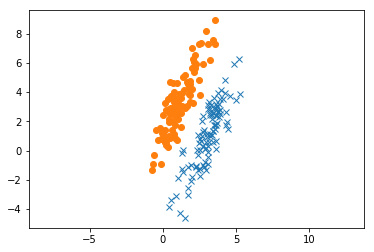

In [0]:
import numpy as np
import matplotlib.pyplot as plt

m1 = [3, 1]
s1 = [[1, 2], [2, 5]]
m2 = [1, 3]
s2 = [[1, 2], [2, 5]]

N = 100

x1 = np.random.multivariate_normal(m1, s1, N)
x2 = np.random.multivariate_normal(m2, s2, N)
plt.plot(x1[:,0], x1[:,1], 'x')
plt.plot(x2[:,0], x2[:,1], 'o')
plt.axis('equal')
plt.show()

## (2) PCA
Apply PCA to the 2-d samples `x1` and `x2` generated in (1) by assuming two distributions as a single sample set. Draw the 1st principal axis on the scatter plot in (1). (Do not use built-in function of PCA)


### In order to do PCA, I tried eigendecomposition of covariance matrix of the sample set.

In [0]:
# concatenate two sets into a single sample set
x = np.concatenate((x1, x2), axis=0)

# get mean values of two feature dimensionalities
mean = np.mean(x, axis=0)

# get covariance matrix by calculating X^T * X, X: decentralized x
cov_mat = (x - mean).T.dot(x - mean) / (x.shape[0] - 1)
print("Covariance Matrix: \n {}".format(cov_mat))

# eigen decomposition
pca_evals, pca_evecs = np.linalg.eig(cov_mat)
print("eigenvaluess:", pca_evals)
print("the 1st eigenvector:", (pca_evecs[0][0], pca_evecs[1][0]))
print("the 2nd eigenvector:", (pca_evecs[0][1], pca_evecs[1][1]))

Covariance Matrix: 
 [[1.88675723 0.69526406]
 [0.69526406 5.90305298]]
eigenvaluess: [1.76980511 6.0200051 ]
the 1st eigenvector: (-0.9861456020869265, 0.1658820408742705)
the 2nd eigenvector: (-0.1658820408742705, -0.9861456020869265)


### After getting eigenvalues and eigenvectors of the covariance matrix, the 1st principal axis could be drawn by using the first eigenvector.

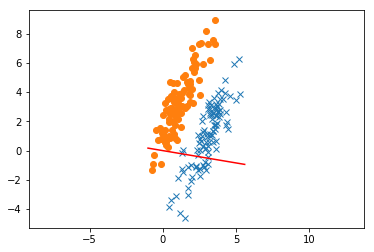

In [0]:
# plot all data points
plt.plot(x1[:,0], x1[:,1], 'x')
plt.plot(x2[:,0], x2[:,1], 'o')
axes = plt.axis()
# draw the 1st principal axis with a red line
plt.plot([axes[0], axes[1]], [axes[0]/pca_evecs[0][0]*pca_evecs[1][0], axes[1]/pca_evecs[0][0]*pca_evecs[1][0]], color='red')

plt.axis('equal')
plt.show()

## (3) LDA
Apply Fisher LDA to the 2-d samples  `x1` and `x2` generated in (1) by assuming the two distributions are two different classes. Draw the calculated axis on the scatter plot. (Do not use built-in function of LDA)

### Computing the 2-d mean vectors of the two classes (x1 and x2):

In [0]:
mean1 = np.mean(x1, axis=0)
mean2 = np.mean(x2, axis=0)
print('Mean vectors: {}, {}'.format(mean1, mean2))

Mean vectors: [3.06380702 1.04969623], [1.12925415 3.31190934]


### Computing the Scatter Matrices: the within-class scatter matrix $S_{W}$ and the between-class scatter matrix $S_{B}$

In [0]:
# S_{W} is equal to the sigma of Si, in which Si denotes the scatter matrix for every class (x1 and x2)
# Actually, Si is the sum of mean square differences
mean_list = [mean1, mean2]
x_list = [x1, x2]
SW = np.zeros((2, 2))
for i, mean in zip(range(2), mean_list):
    scatter_matrix = np.zeros((2, 2))
    for item in x_list[i]:
        item_v = item.reshape(2, 1)
        mean_v = mean.reshape(2, 1)
        scatter_matrix += (item_v - mean_v).dot((item_v - mean_v).T)
    SW += scatter_matrix
print("The within-class scatter matrix: \n{}".format(SW))

print("------------------------------------------")
# S_{B} = Simga(Ni * (mi - m) * (mi - m)^T), where m is the overall mean, mi is the mean for class i.
M = np.mean(x, axis=0)
SB = np.zeros((2, 2))
for i, mean in zip(range(2), mean_list):
    Ni = x_list[i].shape[0]
    mean_v = mean.reshape(2, 1)
    M_v = M.reshape(2, 1)
    SB += Ni * (mean_v - M_v).dot((mean_v - M_v).T)
print("The between-class scatter matrix: \n{}".format(SB))


The within-class scatter matrix: 
[[188.3399484  357.17609149]
 [357.17609149 918.82713497]]
------------------------------------------
The between-class scatter matrix: 
[[ 187.12474131 -218.81854415]
 [-218.81854415  255.88040859]]


### Computing eigenvalues and eigenvectors for the matrix $S_{W}^{-1}S_{B}$

In [0]:
lda_evals, lda_evecs = np.linalg.eig(np.linalg.inv(SW).dot(SB))
# Sorting decreasingly with respect to eigenvalue
idx = lda_evals.argsort()[::-1]
lda_evals = lda_evals[idx]
lda_evecs = lda_evecs[:, idx]

for i in range(len(lda_evals)):
    lda_evec = lda_evecs[:, i]
    print("No.{}, Eigenvalue:{}, eigenvector:{}".format(i, lda_evals[i], lda_evec))

No.0, Eigenvalue:8.277602137047728, eigenvector:[ 0.91798958 -0.39660451]
No.1, Eigenvalue:4.440892098500626e-16, eigenvector:[0.76000094 0.64992197]


Here, we can see the second eigenvalue is very close to zero, meaning less informative. <br> 
Thus the number of discriminants is equal to one in this task. (the first eigenvector)

### Draw the calculated axis based on the 1st eigenvector:

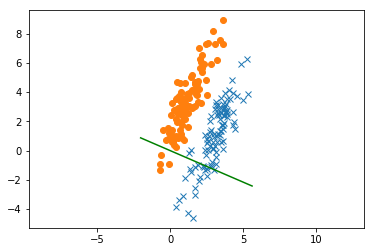

In [0]:
plt.plot(x1[:,0], x1[:,1], 'x')
plt.plot(x2[:,0], x2[:,1], 'o')
plt.plot([2*axes[0], axes[1]], [2*axes[0]/lda_evecs[0][0]*lda_evecs[1][0], axes[1]/lda_evecs[0][0]*lda_evecs[1][0]], color='green')

plt.axis('equal')
plt.show()

## (4)
Show the 1-d histograms of the sample data transformed by the calculated axes in (2) and (3).

### Transforming data using PCA

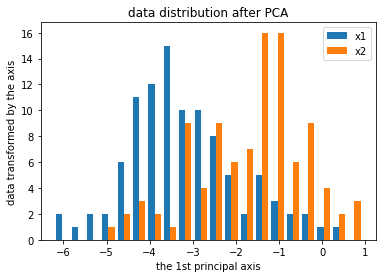

In [0]:
new_x = np.matmul(x, pca_evecs[:][0])
data_x = np.concatenate((new_x[: 100].reshape(100, 1), new_x[100: 200].reshape(100, 1)), axis=1)
plt.hist(data_x, bins=20, label=['x1', 'x2'])
plt.xlabel('the 1st principal axis')
plt.ylabel('data transformed by the axis')
plt.title('data distribution after PCA')
plt.legend()
plt.show()

### Transforming data using LDA

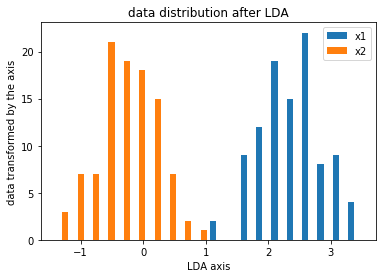

In [0]:
w = lda_evecs[:, 0].reshape(2, 1)
x_t = x.dot(w)
data_x_t = np.concatenate((x_t[: 100].reshape(100, 1), x_t[100: 200].reshape(100, 1)), axis=1)
plt.hist(data_x_t, bins=20, label=['x1', 'x2'])
plt.xlabel('LDA axis')
plt.ylabel('data transformed by the axis')
plt.title('data distribution after LDA')
plt.legend()
plt.show()

## Discussions


Here, we can see the difference between PCA and LDA obviously. <br>
By using PCA, we could get a more efficient representation of the data set. Formally, PCA is a dimension-reduction tool that helps us convert multiple correlated variables into a set of linearly uncorrelated variables whose size often becomes smaller. <br>
On the other hand, as a supervised method, LDA is aimed at finding a linear combination of features that separates two or more classes of objects, which could be used for linear classification as well as dimensionality reduction.